In [3]:
#Panagiotis Anastasakis
#Aitor Beñaran
#Eleni Dretaki

In [4]:
#Run this cell twice to filter the warnings!

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from numpy import linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import  Ridge, Lasso, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVR, SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

## Loading the Abalone data

In [5]:
df = pd.read_csv('abalone.csv', sep=',')

df.columns = ['sex', 'length', 'diameter', 'height', 'whole weight','shucked weight', 'viscera weight', 'shell weight', 'rings']

df_c = df.copy()

df['age'] = df['rings'] + 1.5
df = df.drop(columns = 'rings')

mean = df['age'].mean()
std = df['age'].std()

df

sex  length  diameter  height  whole weight  shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera weight  shell weight   age  
0             0.1010        0.1500  16.5  
1             0.0485        0.0700   8.5  
2             0.1415        0.2100  10.5  
3             0.1140        0.1550  11.5  
4             0.0395        0.0550   8.5  
...              ...           ...   ...  
4172          0.2390        0.2490  12.5  
4173          0.2145        0.2605  11.5  
4174          0.2875        0.3080  10.5  
4175          0.2610        0.2960  11.5  
4176          0.3765        0.4950  13.5  

[4177 rows x 9 columns]

In [6]:
df.describe()

length     diameter       height  whole weight  shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       viscera weight  shell weight          age  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831    11.433684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     2.500000  
25%          0.093500      0.130000     9.500000  
50%          0.171000      0.234000    10.500000  
75%          0.253000      0.329000    12.500000  
max          0.760000      1.005000    30.500000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


## Visualizing the data

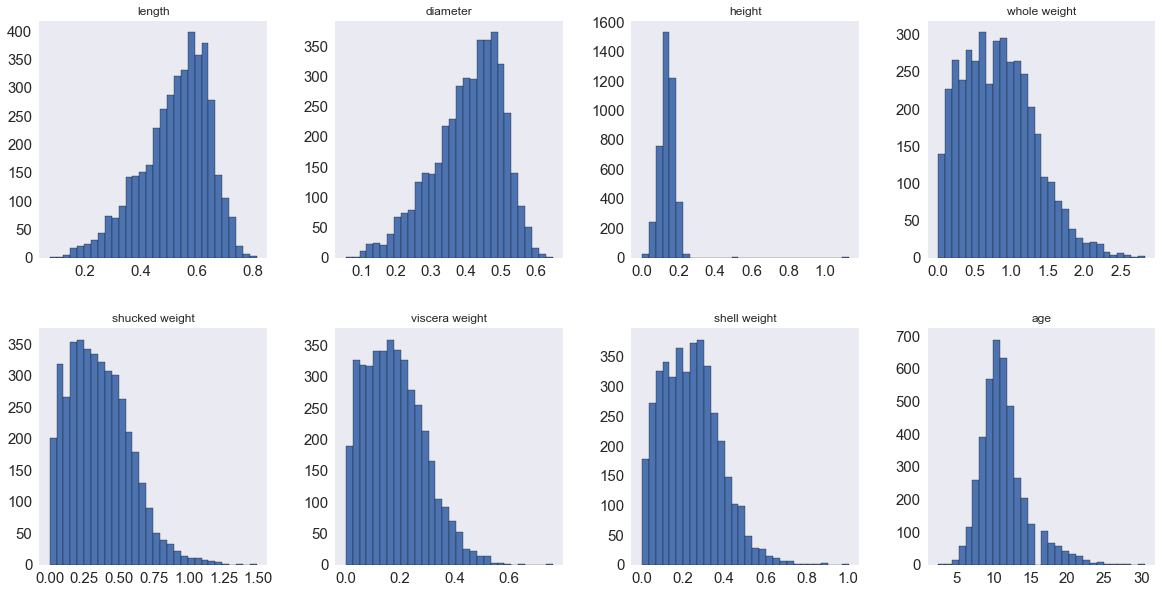

In [8]:
plt.style.use('seaborn')

df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30, edgecolor='black',xlabelsize=15,ylabelsize=15)
plt.show()

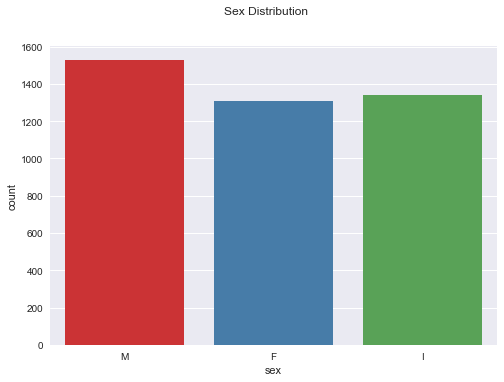

In [9]:
sns.countplot(x = 'sex', data = df, palette="Set1")
plt.suptitle("Sex Distribution")
plt.show()

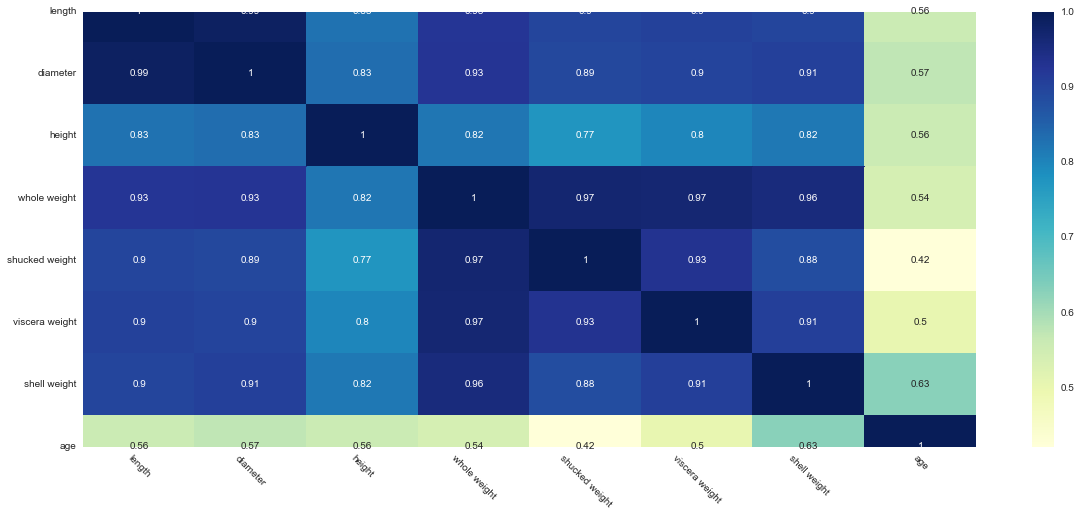

In [10]:
numerical_features = ['length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','age']
numerical_features_c = ['length','diameter','height','whole weight','shucked weight','viscera weight','shell weight']
plt.figure(figsize=(20,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="YlGnBu")
plt.xticks(rotation=315)
plt.show()

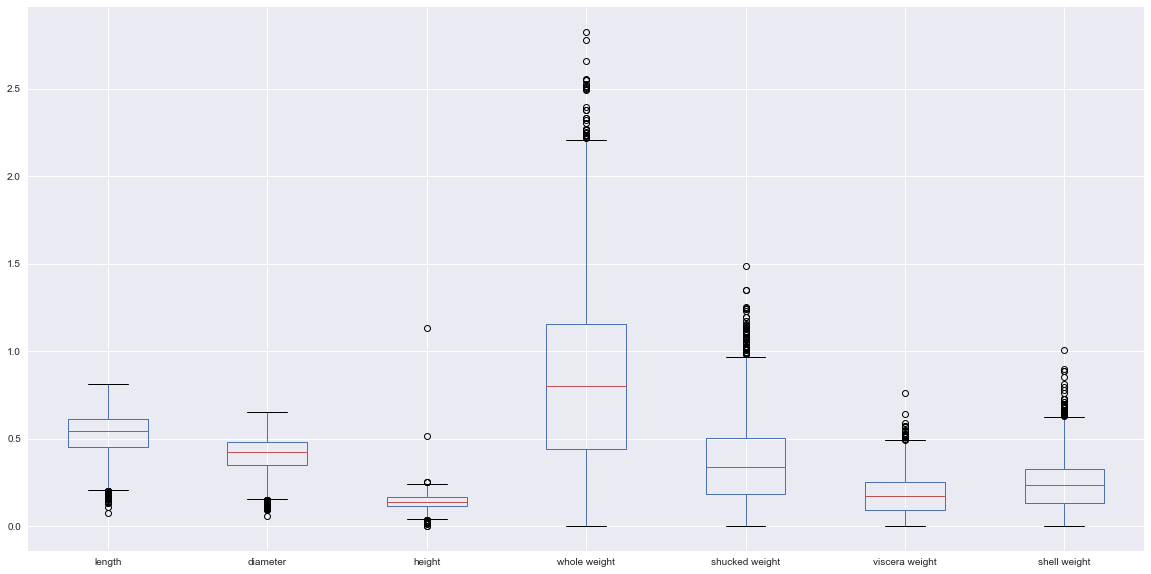

In [11]:
df.iloc[0:,0:-1].boxplot(figsize=(20,10))
plt.show()

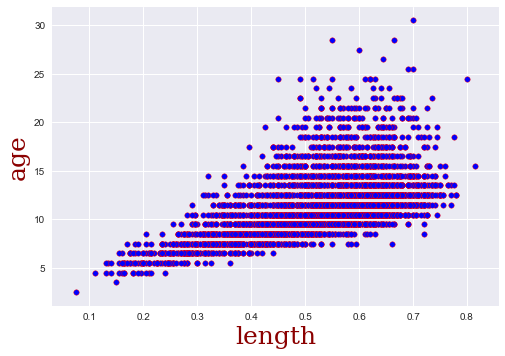

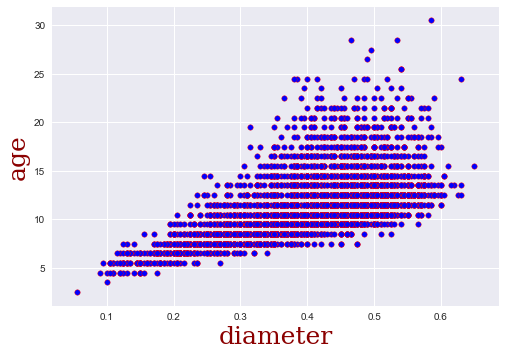

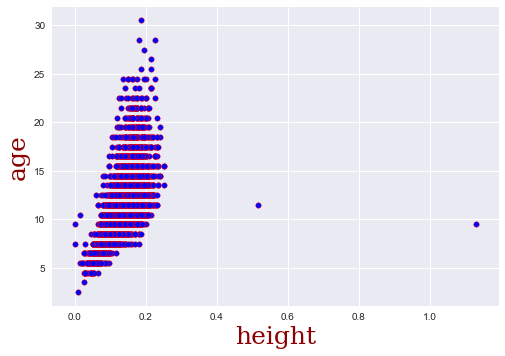

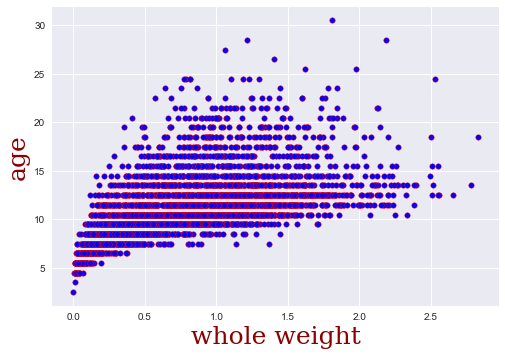

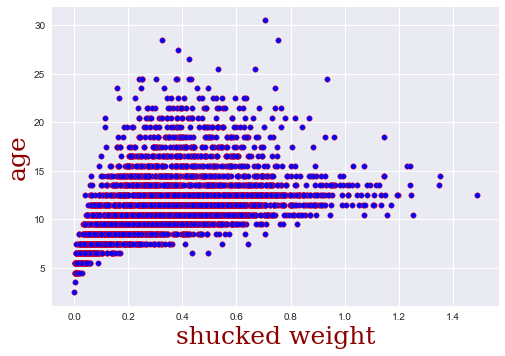

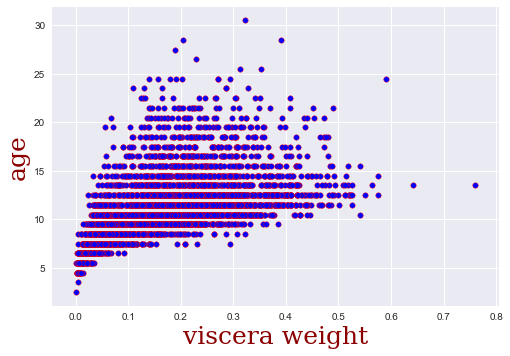

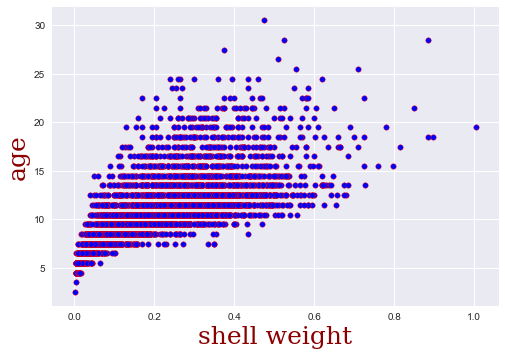

In [12]:
for column in df.columns[1:-1]:
    plt.scatter(df[column], df['age'],s=30, c = 'blue',edgecolor='red', linewidth=0.4)
    plt.xlabel('{}'.format(column), fontdict = {'family': 'serif','color':  'darkred','weight': 'normal','size': 25})
    plt.ylabel('age', fontdict = {'family': 'serif','color':  'darkred','weight': 'normal','size': 25})
    plt.show()

## Normalizing the data using the standard normal distribution

In [13]:
df_norm = df.copy()
df_norm[numerical_features]= (df_norm[numerical_features] - df_norm[numerical_features].mean())/df_norm[numerical_features].std()

df_c_norm = df_c.copy()
df_c_norm[numerical_features_c]= (df_c_norm[numerical_features_c] - df_c_norm[numerical_features_c].mean())/df_c_norm[numerical_features_c].std()

In [14]:
df_norm

sex    length  diameter    height  whole weight  shucked weight  \
0      M -0.574489 -0.432097 -1.064297     -0.641821       -0.607613   
1      M -1.448812 -1.439757 -1.183837     -1.230130       -1.170770   
2      F  0.050027  0.122116 -0.107978     -0.309432       -0.463444   
3      M -0.699393 -0.432097 -0.347058     -0.637743       -0.648160   
4      I -1.615350 -1.540523 -1.422916     -1.271933       -1.215822   
...   ..       ...       ...       ...           ...             ...   
4172   F  0.341468  0.424414  0.609261      0.118799        0.047902   
4173   M  0.549640  0.323648 -0.107978      0.279896        0.358765   
4174   M  0.632909  0.676328  1.565580      0.708127        0.748470   
4175   F  0.841081  0.777094  0.250642      0.541933        0.773248   
4176   M  1.548867  1.482456  1.326500      2.283407        2.640677   

      viscera weight  shell weight       age  
0          -0.726125     -0.638140  1.571355  
1          -1.205077     -1.212842 -0.909904  
2          -0.356647     -0.207114 -0.289589  
3          -0.607527     -0.602222  0.020568  
4          -1.287183     -1.320599 -0.909904  
...              ...           ...       ...  
4172        0.532836      0.073053  0.330726  
4173        0.309325      0.155666  0.020568  
4174        0.975296      0.496895 -0.289589  
4175        0.733540      0.410690  0.020568  
4176        1.787235      1.840260  0.640883  

[4177 rows x 9 columns]

In [15]:
df_norm.describe()

length      diameter        height  whole weight  shucked weight  \
count  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03    4.177000e+03   
mean  -4.052248e-15 -1.427480e-14  2.489313e-14 -5.211483e-15    4.495539e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00   
min   -3.738706e+00 -3.555842e+00 -3.335554e+00 -1.685890e+00   -1.614537e+00   
25%   -6.161238e-01 -5.832460e-01 -5.861373e-01 -7.896632e-01   -7.810650e-01   
50%    1.749304e-01  1.724987e-01  1.156191e-02 -5.963053e-02   -1.052765e-01   
75%    7.578124e-01  7.267114e-01  6.092612e-01  6.612257e-01    6.425960e-01   
max    2.423190e+00  2.439733e+00  2.368045e+01  4.071783e+00    5.084779e+00   

       viscera weight  shell weight           age  
count    4.177000e+03  4.177000e+03  4.177000e+03  
mean    -2.685533e-15  7.418852e-16 -2.344306e-17  
std      1.000000e+00  1.000000e+00  1.000000e+00  
min     -1.642976e+00 -1.704930e+00 -2.770849e+00  
25%     -7.945464e-01 -7.818159e-01 -5.997466e-01  
50%     -8.752154e-02 -3.470378e-02 -2.895892e-01  
75%      6.605564e-01  6.477544e-01  3.307257e-01  
max      5.285867e+00  5.503983e+00  5.913560e+00

### Results dictionaries

In [16]:
results_regr_er1_acc = {}
results_regr_er2_acc = {}
results_regr_er3_acc = {}

results_class_maxer0_acc = {}
results_class_maxer1_acc = {}
results_class_maxer2_acc = {}

results_yo_acc = {}

# Model implementation for Abalone age prediction

## Part 1: Predicting the age using regression

### Getting the train and the test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(['sex','age'], axis = 1).values, df_norm['age'].values,
                                                    test_size = 0.3, random_state = 123)

### Function for the prediction tables

In [18]:
def predreport(y_pred, y_test):
    diff = abs(y_pred.flatten() - y_test.flatten())
    priority = []
    for i in diff:
        if i > 2.0001:
            priority.append(3)
        elif i> 1.0001:
            priority.append(2)
        else:
            priority.append(1)
    print("Error Importance 1 (error < 1) reported in ", priority.count(1),
            "cases\n")
    print("Error Importance 2 (1 < error < 2) reported in", priority.count(2), 
            "cases\n")                                 
    print("Error Importance 3 (error > 2) reported in ", priority.count(3),    
            "cases\n")
    colors = ['rgb(102, 153, 255)','rgb(0, 255, 0)', 
                'rgb(255, 153, 51)', 'rgb(255, 51, 0)']
    fig = go.Figure(data=[go.Table(header=
                    dict(
                        values=['Actual Values', 'Predictions', 
                        'Difference', "Error Importance"],
                        line_color=[np.array(colors)[0]],
                        fill_color=[np.array(colors)[0]],
                                    align='left'),
                    cells=dict(
                        values=[y_test.flatten(),y_pred.flatten(),
                                diff, priority], 
                        line_color=[np.array(colors)[priority]],
                        fill_color=[np.array(colors)[priority]],  
                                    align='left'))])
    fig.show()
    return priority.count(1)*100/len(y_test), priority.count(2)*100/len(y_test), priority.count(3)*100/len(y_test)

### Linear Regression

In [19]:
linear_regr = linear_model.LinearRegression()

linear_regr.fit(X_train,y_train)

y_train_pred = linear_regr.predict(X_train)
y_test_pred = linear_regr.predict(X_test)

# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Linear Regression): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (Linear Regression): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (Linear Regression): %.4f\n' % r2_test)

print('The results of the implementation of the Linear Regression:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['Linear'] = round(er_1,2)
results_regr_er2_acc['Linear'] = round(er_2,2)
results_regr_er3_acc['Linear'] = round(er_3,2)

Mean squared error (Linear Regression): 0.4682

r2 score for the train set (Linear Regression): 0.5292
r2 score for the test set (Linear Regression): 0.5226

The results of the implementation of the Linear Regression:


Error Importance 1 (error < 1) reported in  540 cases

Error Importance 2 (1 < error < 2) reported in 381 cases

Error Importance 3 (error > 2) reported in  333 cases



### Ridge Regression

In [20]:
folds = KFold(n_splits=5, shuffle=True)
params = {'alpha': np.linspace(0.0001,50,1000)}
ridge= Ridge()
model_cv = GridSearchCV(estimator = ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   11.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 5.01499499e-02, 1.00199900e-01, 1.50249850e-01,
       2.00299800e-0...
       4.90490510e+01, 4.90991009e+01, 4.91491509e+01, 4.91992008e+01,
       4.92492508e+01, 4.92993007e+01, 4.93493507e+01, 4.93994006e+01,
       4.94494506e+01, 4.94995005e+01, 4.95495505e+01, 4.95996004e+01,
       4.96496504e+01, 4.96997003e+01, 4.97497503e+01, 4.97998002e+01,
       4.98498502e+01, 4.98999001e+01, 4.99499501e+01, 5.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [21]:
A=model_cv.best_params_

In [22]:
ridge_regr = Ridge(list(A.values())[0]) #### Best tuning parameter

ridge_regr.fit(X_train,y_train)

y_train_pred = ridge_regr.predict(X_train)
y_test_pred = ridge_regr.predict(X_test)


# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Ridge Regression): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (Ridge Regression): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (Ridge Regression): %.4f\n' % r2_test)

print('The results of the implementation of the Ridge Regression:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['Ridge'] = round(er_1,2)
results_regr_er2_acc['Ridge'] = round(er_2,2)
results_regr_er3_acc['Ridge'] = round(er_3,2)

Mean squared error (Ridge Regression): 0.4678

r2 score for the train set (Ridge Regression): 0.5292
r2 score for the test set (Ridge Regression): 0.5230

The results of the implementation of the Ridge Regression:


Error Importance 1 (error < 1) reported in  539 cases

Error Importance 2 (1 < error < 2) reported in 383 cases

Error Importance 3 (error > 2) reported in  332 cases



### Lasso Regression

In [23]:
folds = KFold(n_splits=5, shuffle=True)
params = {'alpha': np.linspace(0.0001,50,1000)}
lasso= Lasso()
model_cv = GridSearchCV(estimator = lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   11.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 5.0...
       4.90490510e+01, 4.90991009e+01, 4.91491509e+01, 4.91992008e+01,
       4.92492508e+01, 4.92993007e+01, 4.93493507e+01, 4.93994006e+01,
       4.94494506e+01, 4.94995005e+01, 4.95495505e+01, 4.95996004e+01,
       4.96496504e+01, 4.96997003e+01, 4.97497503e+01, 4.97998002e+01,
       4.98498502e+01, 4.98999001e+01, 4.99499501e+01, 5.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [24]:
B = model_cv.best_params_

In [25]:
lasso_regr = Lasso(list(B.values())[0]) #### Best tuning parameter

lasso_regr.fit(X_train,y_train)

y_train_pred = lasso_regr.predict(X_train)
y_test_pred = lasso_regr.predict(X_test)

# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Lasso Regression): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (Lasso Regression): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (Lasso Regression): %.4f\n' % r2_test)

print('The results of the implementation of the Lasso Regression:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['Lasso'] = round(er_1,2)
results_regr_er2_acc['Lasso'] = round(er_2,2)
results_regr_er3_acc['Lasso'] = round(er_3,2)

Mean squared error (Lasso Regression): 0.4681

r2 score for the train set (Lasso Regression): 0.5292
r2 score for the test set (Lasso Regression): 0.5227

The results of the implementation of the Lasso Regression:


Error Importance 1 (error < 1) reported in  538 cases

Error Importance 2 (1 < error < 2) reported in 382 cases

Error Importance 3 (error > 2) reported in  334 cases



### Decision Tree Regression

In [26]:
DT = tree.DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

# Results


print('The results of the implementation of the Decision Trees:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['Decision Tree'] = round(er_1,2)
results_regr_er2_acc['Decision Tree'] = round(er_2,2)
results_regr_er3_acc['Decision Tree'] = round(er_3,2)

The results of the implementation of the Decision Trees:


Error Importance 1 (error < 1) reported in  648 cases

Error Importance 2 (1 < error < 2) reported in 246 cases

Error Importance 3 (error > 2) reported in  360 cases



### Support Vector Regression (Radial Basis Function kernel)

In [27]:
svr_rbf = SVR(kernel='rbf', gamma=0.043)
svr_rbf.fit(X_train, y_train)

y_train_pred = svr_rbf.predict(X_train)
y_test_pred = svr_rbf.predict(X_test)

# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Support Vector Regression with RBF kernel): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (Support Vector Regression with RBF kernel): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (Support Vector Regression with RBF kernel): %.4f\n' % r2_test)

print('The results of the implementation of the Support Vector Regression with RBF kernel:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['SVM(rbf)'] = round(er_1,2)
results_regr_er2_acc['SVM(rbf)'] = round(er_2,2)
results_regr_er3_acc['SVM(rbf)'] = round(er_3,2)

Mean squared error (Support Vector Regression with RBF kernel): 0.4558

r2 score for the train set (Support Vector Regression with RBF kernel): 0.5597
r2 score for the test set (Support Vector Regression with RBF kernel): 0.5353

The results of the implementation of the Support Vector Regression with RBF kernel:


Error Importance 1 (error < 1) reported in  599 cases

Error Importance 2 (1 < error < 2) reported in 366 cases

Error Importance 3 (error > 2) reported in  289 cases



### Support Vector Regression (Linear kernel)

In [28]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

y_train_pred = svr_linear.predict(X_train)
y_test_pred = svr_linear.predict(X_test)

# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (Support Vector Regression with Linear kernel): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (Support Vector Regression with Linear kernel): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (Support Vector Regression with Linear kernel): %.4f\n' % r2_test)

print('The results of the implementation of the Support Vector Regression with Linear kernel:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['SVM(linear)'] = round(er_1,2)
results_regr_er2_acc['SVM(linear)'] = round(er_2,2)
results_regr_er3_acc['SVM(linear)'] = round(er_3,2)

Mean squared error (Support Vector Regression with Linear kernel): 0.4842

r2 score for the train set (Support Vector Regression with Linear kernel): 0.5064
r2 score for the test set (Support Vector Regression with Linear kernel): 0.5063

The results of the implementation of the Support Vector Regression with Linear kernel:


Error Importance 1 (error < 1) reported in  594 cases

Error Importance 2 (1 < error < 2) reported in 353 cases

Error Importance 3 (error > 2) reported in  307 cases



### K-nearest neighbors Regression

Training Score:  0.5430915482326443
Testing Score:  0.5243787767763461


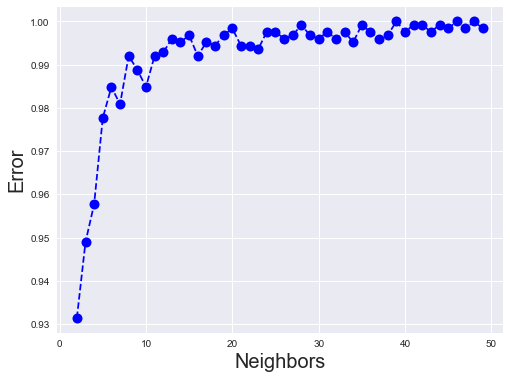

In [29]:
error_rate = []
for i in range(2,50):
    knn = KNeighborsRegressor(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))
    
plt.figure(figsize = (8,6))
plt.xlabel('Neighbors', size=20)
plt.ylabel('Error', size=20)
plt.plot(range(2,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
print('Training Score: ', knn.score(X_train, y_train))
print('Testing Score: ', knn.score(X_test, y_test))

In [30]:
knn = KNeighborsRegressor(n_neighbors= 43)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Results

mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (K-nearest neighbors regression): %.4f\n" % mse)

r2_train = metrics.r2_score(y_train,y_train_pred)
print('r2 score for the train set (K-nearest neighbors regression): %.4f' % r2_train)
r2_test = metrics.r2_score(y_test,y_test_pred)
print('r2 score for the test set (K-nearest neighbors regression): %.4f\n' % r2_test)

print('The results of the implementation of the K-nearest neighbors regression:\n\n')
er_1, er_2, er_3 = predreport(y_test_pred * std + mean, y_test * std + mean)

results_regr_er1_acc['Knn'] = round(er_1,2)
results_regr_er2_acc['Knn'] = round(er_2,2)
results_regr_er3_acc['Knn'] = round(er_3,2)

Mean squared error (K-nearest neighbors regression): 0.4627

r2 score for the train set (K-nearest neighbors regression): 0.5478
r2 score for the test set (K-nearest neighbors regression): 0.5282

The results of the implementation of the K-nearest neighbors regression:


Error Importance 1 (error < 1) reported in  585 cases

Error Importance 2 (1 < error < 2) reported in 376 cases

Error Importance 3 (error > 2) reported in  293 cases



## Part 2: Predicting the age using classification

### Getting the train and the test data

In [31]:
df_c_norm

sex    length  diameter    height  whole weight  shucked weight  \
0      M -0.574489 -0.432097 -1.064297     -0.641821       -0.607613   
1      M -1.448812 -1.439757 -1.183837     -1.230130       -1.170770   
2      F  0.050027  0.122116 -0.107978     -0.309432       -0.463444   
3      M -0.699393 -0.432097 -0.347058     -0.637743       -0.648160   
4      I -1.615350 -1.540523 -1.422916     -1.271933       -1.215822   
...   ..       ...       ...       ...           ...             ...   
4172   F  0.341468  0.424414  0.609261      0.118799        0.047902   
4173   M  0.549640  0.323648 -0.107978      0.279896        0.358765   
4174   M  0.632909  0.676328  1.565580      0.708127        0.748470   
4175   F  0.841081  0.777094  0.250642      0.541933        0.773248   
4176   M  1.548867  1.482456  1.326500      2.283407        2.640677   

      viscera weight  shell weight  rings  
0          -0.726125     -0.638140     15  
1          -1.205077     -1.212842      7  
2          -0.356647     -0.207114      9  
3          -0.607527     -0.602222     10  
4          -1.287183     -1.320599      7  
...              ...           ...    ...  
4172        0.532836      0.073053     11  
4173        0.309325      0.155666     10  
4174        0.975296      0.496895      9  
4175        0.733540      0.410690     10  
4176        1.787235      1.840260     12  

[4177 rows x 9 columns]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_c_norm.drop(['sex','rings'], axis = 1).values, 
                                                    df_c_norm['rings'].values, test_size = 0.3, random_state = 123)

### Linear Discriminant Analysis Classification

In [33]:
def accuracy_maxerror1(y_test, y_pred):
    return accuracy_score(y_test,y_pred) + accuracy_score(y_test,y_pred + 1) + accuracy_score(y_test,y_pred - 1)

def accuracy_maxerror2(y_test, y_pred):
    return accuracy_score(y_test,y_pred) + accuracy_score(y_test,y_pred + 1) + accuracy_score(y_test,y_pred - 1) + accuracy_score(y_test,y_pred + 2) + accuracy_score(y_test,y_pred + 2)

In [34]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train,y_train)

y_train_pred = LDA.predict(X_train)
y_test_pred = LDA.predict(X_test)

# Results

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Linear Discriminant Analysis Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Linear Discriminant Analysis Classification):{0: .2f}%\n'.format(acc_test*100))

acc_er1_train = accuracy_maxerror1(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1(Linear Discriminant Analysis Classification):{0: .2f}%'.format(acc_er1_train*100))
acc_er1_test = accuracy_maxerror1(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1(Linear Discriminant Analysis Classification):{0: .2f}%\n'.format(acc_er1_test*100))

acc_er2_train = accuracy_maxerror2(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1 or 2(Linear Discriminant Analysis Classification):{0: .2f}%'.format(acc_er2_train*100))
acc_er2_test = accuracy_maxerror2(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1 or 2(Linear Discriminant Analysis Classification):{0: .2f}%'.format(acc_er2_test*100))

results_class_maxer0_acc['LDA'] = round(acc_test*100,2)
results_class_maxer1_acc['LDA'] = round(acc_er1_test*100,2)
results_class_maxer2_acc['LDA'] = round(acc_er2_test*100,2)

Accuracy for the train set(Linear Discriminant Analysis Classification): 28.36%
Accuracy for the test set(Linear Discriminant Analysis Classification): 25.12%

Accuracy for the train set with error 0 or 1(Linear Discriminant Analysis Classification): 63.67%
Accuracy for the test set with error 0 or 1(Linear Discriminant Analysis Classification): 62.20%

Accuracy for the train set with error 0 or 1 or 2(Linear Discriminant Analysis Classification): 82.76%
Accuracy for the test set with error 0 or 1 or 2(Linear Discriminant Analysis Classification): 82.46%


### Support Vector Machine One-Versus-One Classification

In [35]:
SVM1vs1 = OneVsOneClassifier(LinearSVC(random_state=0))

SVM1vs1.fit(X_train, y_train)

y_train_pred = SVM1vs1.predict(X_train)
y_test_pred = SVM1vs1.predict(X_test)

# Results

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Support Vector Machine One Vs One Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Support Vector Machine One Vs One Classification):{0: .2f}%\n'.format(acc_test*100))


acc_er1_train = accuracy_maxerror1(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1(Support Vector Machine One Vs One Classification):{0: .2f}%'.format(acc_er1_train*100))
acc_er1_test = accuracy_maxerror1(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1(Support Vector Machine One Vs One Classification):{0: .2f}%\n'.format(acc_er1_test*100))

acc_er2_train = accuracy_maxerror2(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1 or 2(Support Vector Machine One Vs One Classification):{0: .2f}%'.format(acc_er2_train*100))
acc_er2_test = accuracy_maxerror2(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1 or 2(Support Vector Machine One Vs One Classification):{0: .2f}%'.format(acc_er2_test*100))

results_class_maxer0_acc['SVM 1vs1'] = round(acc_test*100,2)
results_class_maxer1_acc['SVM 1vs1'] = round(acc_er1_test*100,2)
results_class_maxer2_acc['SVM 1vs1'] = round(acc_er2_test*100,2)

Accuracy for the train set(Support Vector Machine One Vs One Classification): 29.46%
Accuracy for the test set(Support Vector Machine One Vs One Classification): 26.40%

Accuracy for the train set with error 0 or 1(Support Vector Machine One Vs One Classification): 64.90%
Accuracy for the test set with error 0 or 1(Support Vector Machine One Vs One Classification): 64.11%

Accuracy for the train set with error 0 or 1 or 2(Support Vector Machine One Vs One Classification): 85.36%
Accuracy for the test set with error 0 or 1 or 2(Support Vector Machine One Vs One Classification): 83.89%


### Support Vector Machine One-Versus-All Classification

In [36]:
SVM1vsAll = OneVsRestClassifier(LinearSVC(random_state=0))

SVM1vsAll.fit(X_train, y_train)

y_train_pred = SVM1vsAll.predict(X_train)
y_test_pred = SVM1vsAll.predict(X_test)

# Results

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Support Vector Machine One Vs All Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Support Vector Machine One Vs All Classification):{0: .2f}%\n'.format(acc_test*100))

acc_er1_train = accuracy_maxerror1(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1(Support Vector Machine One Vs All Classification):{0: .2f}%'.format(acc_er1_train*100))
acc_er1_test = accuracy_maxerror1(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1(Support Vector Machine One Vs All Classification):{0: .2f}%\n'.format(acc_er1_test*100))

acc_er2_train = accuracy_maxerror2(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1 or 2(Support Vector Machine One Vs All Classification):{0: .2f}%'.format(acc_er2_train*100))
acc_er2_test = accuracy_maxerror2(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1 or 2(Support Vector Machine One Vs All Classification):{0: .2f}%'.format(acc_er2_test*100))

results_class_maxer0_acc['SVM 1vsAll'] = round(acc_test*100,2)
results_class_maxer1_acc['SVM 1vsAll'] = round(acc_er1_test*100,2)
results_class_maxer2_acc['SVM 1vsAll'] = round(acc_er2_test*100,2)

Accuracy for the train set(Support Vector Machine One Vs All Classification): 29.22%
Accuracy for the test set(Support Vector Machine One Vs All Classification): 23.60%

Accuracy for the train set with error 0 or 1(Support Vector Machine One Vs All Classification): 63.33%
Accuracy for the test set with error 0 or 1(Support Vector Machine One Vs All Classification): 62.04%

Accuracy for the train set with error 0 or 1 or 2(Support Vector Machine One Vs All Classification): 84.54%
Accuracy for the test set with error 0 or 1 or 2(Support Vector Machine One Vs All Classification): 84.53%


### Decision Tree Classification

In [37]:
DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

# Results

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Decision Tree Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Decision Tree Classification):{0: .2f}%\n'.format(acc_test*100))

acc_er1_train = accuracy_maxerror1(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1(Decision Tree Classification):{0: .2f}%'.format(acc_er1_train*100))
acc_er1_test = accuracy_maxerror1(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1(Decision Tree Classification):{0: .2f}%\n'.format(acc_er1_test*100))

acc_er2_train = accuracy_maxerror2(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1 or 2(Decision Tree Classification):{0: .2f}%'.format(acc_er2_train*100))
acc_er2_test = accuracy_maxerror2(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1 or 2(Decision Tree Classification):{0: .2f}%'.format(acc_er2_test*100))

results_class_maxer0_acc['Decision Tree'] = round(acc_test*100,2)
results_class_maxer1_acc['Decision Tree'] = round(acc_er1_test*100,2)
results_class_maxer2_acc['Decision Tree'] = round(acc_er2_test*100,2)

Accuracy for the train set(Decision Tree Classification): 100.00%
Accuracy for the test set(Decision Tree Classification): 18.98%

Accuracy for the train set with error 0 or 1(Decision Tree Classification): 100.00%
Accuracy for the test set with error 0 or 1(Decision Tree Classification): 50.64%

Accuracy for the train set with error 0 or 1 or 2(Decision Tree Classification): 100.00%
Accuracy for the test set with error 0 or 1 or 2(Decision Tree Classification): 69.62%


### K-nearest neighbors Classification

Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.38      0.45      0.41        20
           5       0.32      0.30      0.31        43
           6       0.36      0.34      0.35        80
           7       0.28      0.49      0.36       106
           8       0.31      0.35      0.33       178
           9       0.24      0.33      0.28       204
          10       0.20      0.29      0.24       187
          11       0.25      0.24      0.24       147
          12       0.17      0.04      0.06        83
          13       0.17      0.03      0.05        63
          14       0.00      0.00      0.00        37
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        18
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00        13
  

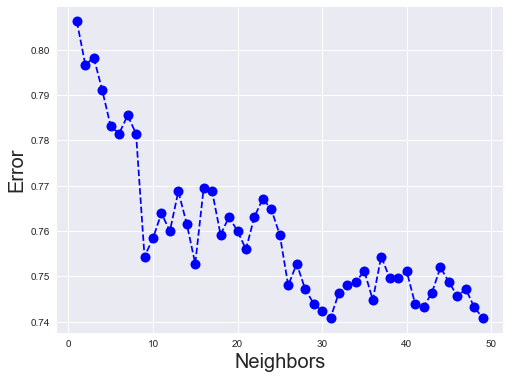

In [38]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))
    
plt.figure(figsize = (8,6))
plt.xlabel('Neighbors', size=20)
plt.ylabel('Error', size=20)
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', knn.score(X_train, y_train))
print('Testing Score: ', knn.score(X_test, y_test))

In [39]:
knn = KNeighborsClassifier(n_neighbors= 22)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Results

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(K-nearest neighbors Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(K-nearest neighbors Classification):{0: .2f}%\n'.format(acc_test*100))

acc_er1_train = accuracy_maxerror1(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1(K-nearest neighbors Classification):{0: .2f}%'.format(acc_er1_train*100))
acc_er1_test = accuracy_maxerror1(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1(K-nearest neighbors Classification):{0: .2f}%\n'.format(acc_er1_test*100))

acc_er2_train = accuracy_maxerror2(y_train, y_train_pred)
print('Accuracy for the train set with error 0 or 1 or 2(K-nearest neighbors Classification):{0: .2f}%'.format(acc_er2_train*100))
acc_er2_test = accuracy_maxerror2(y_test, y_test_pred)
print('Accuracy for the test set with error 0 or 1 or 2(K-nearest neighbors Classification):{0: .2f}%'.format(acc_er2_test*100))

results_class_maxer0_acc['Knn'] = round(acc_test*100,2)
results_class_maxer1_acc['Knn'] = round(acc_er1_test*100,2)
results_class_maxer2_acc['Knn'] = round(acc_er2_test*100,2)

Accuracy for the train set(K-nearest neighbors Classification): 33.53%
Accuracy for the test set(K-nearest neighbors Classification): 23.68%

Accuracy for the train set with error 0 or 1(K-nearest neighbors Classification): 64.56%
Accuracy for the test set with error 0 or 1(K-nearest neighbors Classification): 62.28%

Accuracy for the train set with error 0 or 1 or 2(K-nearest neighbors Classification): 85.63%
Accuracy for the test set with error 0 or 1 or 2(K-nearest neighbors Classification): 86.04%


# Model implementation for Abalone classifiaction as young/old

### Making the binary label for the young/old

In [40]:
boundary = df_c['rings'].mean()
print('The boundary for young/old classification is', boundary)
df_1 = df_c_norm.copy()
df_1_plot = df_c.copy()

The boundary for young/old classification is 9.933684462532918


In [41]:
Rings = []
for i in df_1['rings']:
    if i > boundary:
        Rings.append('1')
    else:
        Rings.append('0')
df_1['Rings'] = Rings
df_1.drop('rings', axis = 1, inplace = True)

df_1_plot['Rings'] = Rings
df_1_plot.drop('rings', axis = 1, inplace = True)

df_1.head()

sex    length  diameter    height  whole weight  shucked weight  \
0   M -0.574489 -0.432097 -1.064297     -0.641821       -0.607613   
1   M -1.448812 -1.439757 -1.183837     -1.230130       -1.170770   
2   F  0.050027  0.122116 -0.107978     -0.309432       -0.463444   
3   M -0.699393 -0.432097 -0.347058     -0.637743       -0.648160   
4   I -1.615350 -1.540523 -1.422916     -1.271933       -1.215822   

   viscera weight  shell weight Rings  
0       -0.726125     -0.638140     1  
1       -1.205077     -1.212842     0  
2       -0.356647     -0.207114     0  
3       -0.607527     -0.602222     1  
4       -1.287183     -1.320599     0

In [42]:
df_1['Rings'].value_counts()

0    2096
1    2081
Name: Rings, dtype: int64

In [43]:
X = df_1.drop(['sex','Rings'], axis = 1).values
y = df_1['Rings'].values

### Visualizing the connection of the features with the young/old label

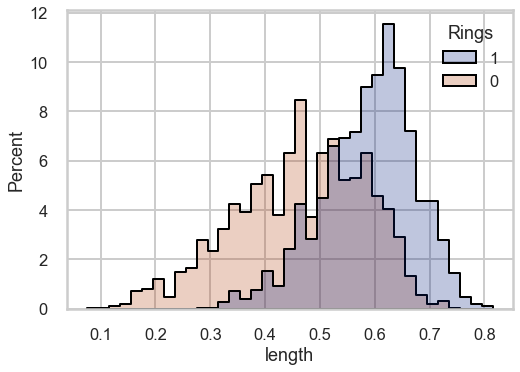

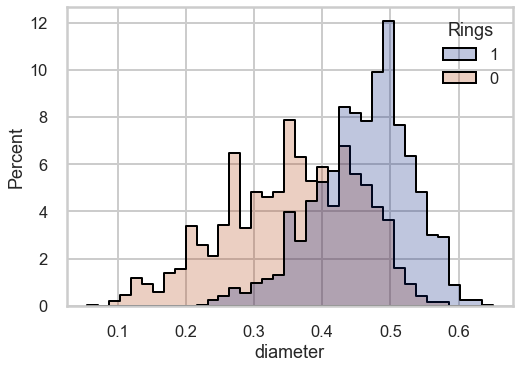

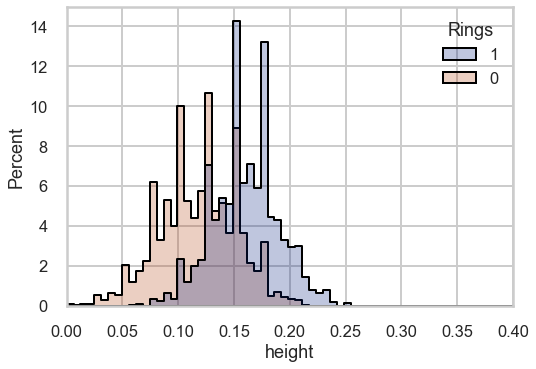

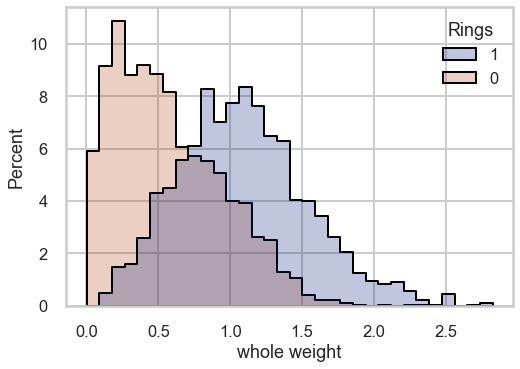

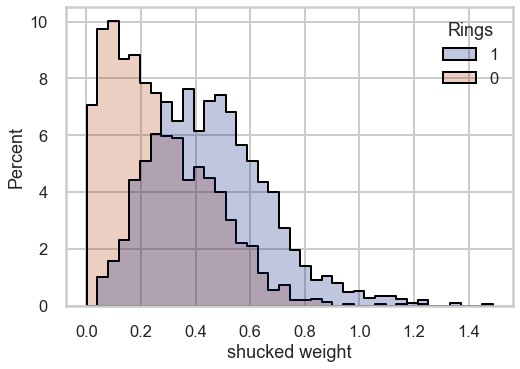

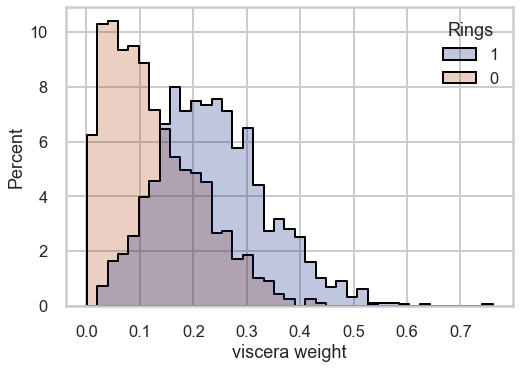

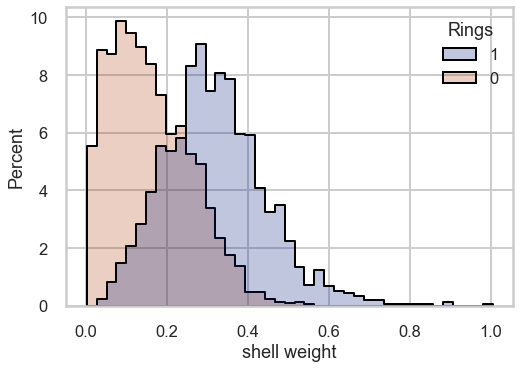

In [44]:
sns.set(style='whitegrid')
sns.set_context('poster', font_scale = 0.75)

for i in range(1,3):
    sns.histplot(df_1_plot, x=df_1_plot.columns[i], hue="Rings", element="step",
                 stat="percent", common_norm=False, palette ='dark',edgecolor='black')
    plt.show()

sns.set(style='whitegrid')
sns.set_context('poster', font_scale = 0.75)
sns.histplot(df_1_plot, x="height", hue="Rings", element="step",stat="percent",
             common_norm=False,palette ='dark',edgecolor='black')
plt.xlim(0, 0.4)
plt.show()    
    
for i in range(4,8):
    sns.histplot(df_1_plot, x=df_1_plot.columns[i], hue="Rings", element="step",
                 stat="percent", common_norm=False, palette ='dark',edgecolor='black')
    plt.show()

In [45]:
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

df_y = df_1_plot.loc[df_1_plot['Rings'] == '0']
df_o = df_1_plot.loc[df_1_plot['Rings'] == '1']

df_sex_y = df_y['sex'].value_counts()
df_sex_o = df_o['sex'].value_counts()

### Visualizing the impact of an Abalone's sex being infant or not to its young/old label

In [46]:
trace = go.Bar(x = df_sex_y.index[: : -1] ,y = df_sex_y.values[: : -1], marker = dict(color = 'orange'))
data = [trace]
layout = go.Layout(height = 400, width = 500, title='Sex distribution for young Abalones')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

In [47]:
trace = go.Bar(x = df_sex_o.index[: : -1] ,y = df_sex_o.values[: : -1], marker = dict(color = 'steelblue'))
data = [trace]
layout = go.Layout(height = 400, width = 500, title='Sex distribution for old Abalones')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

### Getting the train and the test data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### Logistic Regression young/old Classification

In [49]:
LR = LogisticRegression(C=20)

LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Results

print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred))
print('')

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Logistic Regression young/old Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Logistic Regression young/old Classification):{0: .2f}%'.format(acc_test*100))

results_yo_acc['Logistic'] = round(acc_test*100,2)

Confusion Matrix: 
 [[526 109]
 [153 466]]

Accuracy for the train set(Logistic Regression young/old Classification): 78.86%
Accuracy for the test set(Logistic Regression young/old Classification): 79.11%


### Decision Tree young/old Classification

In [50]:
DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

# Results

print('Confusion Matrix: \n', confusion_matrix(y_test, y_test_pred))
print('')

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Decision Tree young/old Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Decision Tree young/old Classification):{0: .2f}%'.format(acc_test*100))

results_yo_acc['Decision Tree'] = round(acc_test*100,2)

Confusion Matrix: 
 [[445 190]
 [161 458]]

Accuracy for the train set(Decision Tree young/old Classification): 100.00%
Accuracy for the test set(Decision Tree young/old Classification): 72.01%


### Support Vector Machine young/old Classification

In [51]:
svm = SVC(kernel='rbf', gamma=0.5)

svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Results

print('Confusion Matrix: \n', confusion_matrix(y_test, y_test_pred))
print('')

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(Support Vector Machine young/old Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(Support Vector Machine young/old Classification):{0: .2f}%'.format(acc_test*100))

results_yo_acc['SVM(rbf)'] = round(acc_test*100,2)

Confusion Matrix: 
 [[501 134]
 [129 490]]

Accuracy for the train set(Support Vector Machine young/old Classification): 80.74%
Accuracy for the test set(Support Vector Machine young/old Classification): 79.03%


### K-nearest neighbors young/old Classification

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       635
           1       0.78      0.78      0.78       619

    accuracy                           0.78      1254
   macro avg       0.78      0.78      0.78      1254
weighted avg       0.78      0.78      0.78      1254

Confusion Matrix: 
 [[501 134]
 [138 481]]
Training Score:  0.7971262401642148
Testing Score:  0.7830940988835726


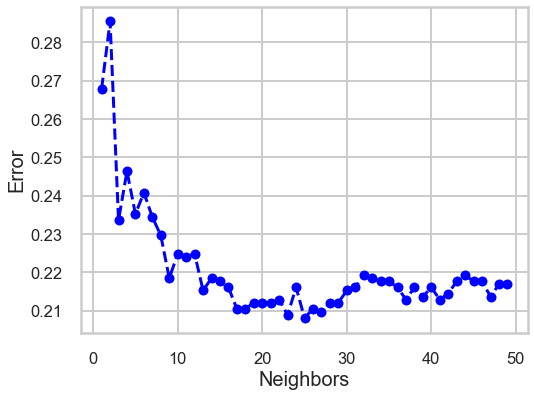

In [52]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_pred))
    
plt.figure(figsize = (8,6))
plt.xlabel('Neighbors', size=20)
plt.ylabel('Error', size=20)
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', knn.score(X_train, y_train))
print('Testing Score: ', knn.score(X_test, y_test))

In [53]:
knn = KNeighborsClassifier(n_neighbors= 27)

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Results

print('Confusion Matrix: \n', confusion_matrix(y_test, y_test_pred))
print('')

acc_train = accuracy_score(y_train, y_train_pred)
print('Accuracy for the train set(K-nearest neighbors young/old Classification):{0: .2f}%'.format(acc_train*100))
acc_test = accuracy_score(y_test, y_test_pred)
print('Accuracy for the test set(K-nearest neighbors young/old Classification):{0: .2f}%'.format(acc_test*100))

results_yo_acc['Knn'] = round(acc_test*100,2)

Confusion Matrix: 
 [[501 134]
 [129 490]]

Accuracy for the train set(K-nearest neighbors young/old Classification): 79.61%
Accuracy for the test set(K-nearest neighbors young/old Classification): 79.03%


# Results

In [54]:
df_1_plot

sex  length  diameter  height  whole weight  shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera weight  shell weight Rings  
0             0.1010        0.1500     1  
1             0.0485        0.0700     0  
2             0.1415        0.2100     0  
3             0.1140        0.1550     1  
4             0.0395        0.0550     0  
...              ...           ...   ...  
4172          0.2390        0.2490     1  
4173          0.2145        0.2605     1  
4174          0.2875        0.3080     0  
4175          0.2610        0.2960     1  
4176          0.3765        0.4950     1  

[4177 rows x 9 columns]

In [55]:
def acc_plot_comparison_regression(dict_acc1,dict_acc2,dict_acc3):
    x = list(dict_acc1.keys())
    y1 = list(dict_acc1.values())
    y2 = list(dict_acc2.values())
    y3 = list(dict_acc3.values())
    
    trace1 = go.Bar(x = x, y = y1, name = 'Error Type 1 (Error < 1)', marker = dict(color = 'cyan'))
    trace2 = go.Bar(x = x, y = y2, name = 'Error Type 2 (1 < Error < 2)', marker = dict(color = 'violet'))
    trace3 = go.Bar(x = x, y = y3, name = 'Error Type 3 (Error > 2)', marker = dict(color = 'olive'))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title = 'Regression for age prediction: Error Type %', width = 750)
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [56]:
acc_plot_comparison_regression(results_regr_er1_acc,results_regr_er2_acc,results_regr_er3_acc)

In [57]:
def acc_plot_comparison_classification(dict_acc1,dict_acc2,dict_acc3):
    x = list(dict_acc1.keys())
    y1 = list(dict_acc1.values())
    y2 = list(dict_acc2.values())
    y3 = list(dict_acc3.values())
    
    trace1 = go.Bar(x = x, y = y1, name = 'Correct Prediction', marker = dict(color = 'cyan'))
    trace2 = go.Bar(x = x, y = y2, name = 'Max Error = 1', marker = dict(color = 'violet'))
    trace3 = go.Bar(x = x, y = y3, name = 'Max Error = 2', marker = dict(color = 'olive'))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title = 'Classification for age prediction: Prediction Accuracy %', width = 750)
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [58]:
acc_plot_comparison_classification(results_class_maxer0_acc,results_class_maxer1_acc,results_class_maxer2_acc)

In [59]:
def acc_plot_comparison__binary_classification(dict_acc):
    x = list(dict_acc.keys())
    y = list(dict_acc.values())
    
    trace = go.Bar(x = x, y = y, name = 'Accuracy', marker = dict(color = 'violet'))
    data = [trace]
    layout = go.Layout(title = 'Binary classification for young/old: Prediction Accuracy %', width = 750)
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [60]:
acc_plot_comparison__binary_classification(results_yo_acc)